# Exploratory Data Analysis on Singapore Resale Flat in 2018

In [1]:
# Library import
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df= pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv',sep=',')
df.shape

(52312, 11)

In [3]:
df = df.loc[(df['month'].str.contains('2018'))]  # Filter out 2018 data only
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
20350,2018-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,10 TO 12,44.0,Improved,1978,59 years 01 month,250000.0
20351,2018-01,ANG MO KIO,3 ROOM,319,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1977,58 years 04 months,300000.0
20352,2018-01,ANG MO KIO,3 ROOM,319,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1977,58 years 04 months,328000.0
20353,2018-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,10 TO 12,68.0,New Generation,1981,62 years,300000.0
20354,2018-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,04 TO 06,68.0,New Generation,1981,62 years,273000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21566 entries, 20350 to 41915
Data columns (total 11 columns):
month                  21566 non-null object
town                   21566 non-null object
flat_type              21566 non-null object
block                  21566 non-null object
street_name            21566 non-null object
storey_range           21566 non-null object
floor_area_sqm         21566 non-null float64
flat_model             21566 non-null object
lease_commence_date    21566 non-null int64
remaining_lease        21566 non-null object
resale_price           21566 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 2.0+ MB


### Overview
- There are 21,566 resale unit registered in 2018<br>
- The average resale price is S\\$441k<br>
- The minimum resale price is S\\$160k while the maximum resale price is S\\$1.185mil<br>
- The median resale price is less than average resale price.<br>

In [5]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,21566.000000,21566.000000,2.156600e+04
mean,98.442892,1993.533571,4.412524e+05
std,24.427415,12.210901,1.575675e+05
min,31.000000,1966.000000,1.600000e+05
25%,82.000000,1984.000000,3.280000e+05
50%,97.000000,1993.000000,4.080000e+05
75%,114.000000,2002.000000,5.150000e+05
max,237.000000,2016.000000,1.185000e+06


In [6]:
#lets see if there are any more columns with missing values 
null_columns=df.columns[df.isnull().any()]
print(null_columns)
df.isnull().sum()

Index([], dtype='object')


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [7]:
df.shape

(21566, 11)

### Number of Resale Unit by Town in 2018
__Top 4 Towns (Above 1500 units)__
1. Woodlands<br>
2. Jurong West<br>
3. Sengkang<br>
4. Punggol

__Last 3 Towns (Below 200 units)__
1. Bukit Timah<br>
2. Marine Parade<br>
3. Central Area

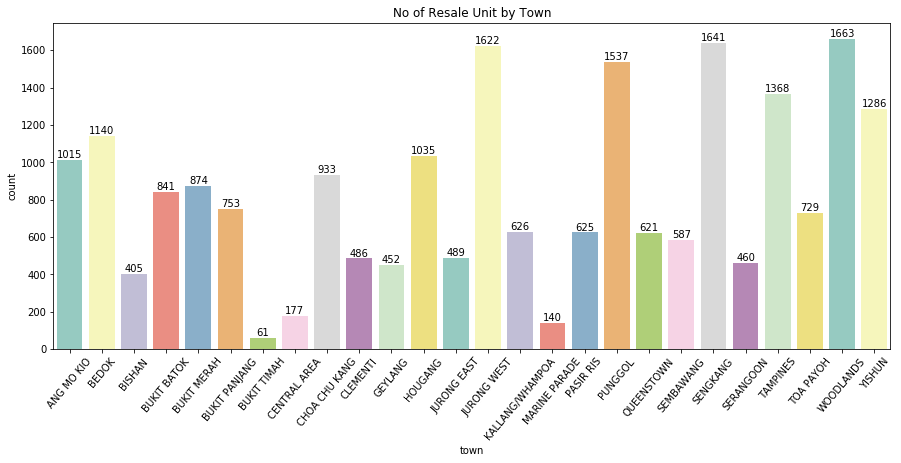

In [8]:
plt.figure(figsize=(15,6))
plot = sns.countplot(x='town', data=df, palette='Set3')
plt.xticks(rotation=50)
plt.title('No of Resale Unit by Town', fontsize=12)
ax = plot.axes

for p in ax.patches:
    ax.annotate( p.get_height(),
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                fontsize=10, 
                color='black',
                xytext=(0,5), 
                textcoords='offset points')

### Resale Price by Town in 2018
- Majority of the minimum resale price is around S\\$200k except Bukit Timah, Tampines, Sembawang and Bishan<br>
- Towns with maximum resale price above S\\$1mil are Toa Payoh, Queenstown, Kallang/Whampoa, Central Area, Bukit Merah, Bukit Timah, Clementi and Bishan<br>
- Even though the maximum resale price in Toa Payoh, Kallang/Whampoa and Clementi are above S\\$1mil, the median resale price is still below S$500k<br>
- There are resale units in Hougang and Tampines that are priced exceptionally high at around S\\$1mil<br>
- In Punggol, Sembawang and Sengkang, there are resale units that are priced exceptionally low too<br>
- In spite of the high supply in Woodlands and Yishun, there are quite a numbers of resale units priced above S\\$550k<br>
- Despite the low supply in Marine Parade, the resale unit is not priced exceptionally high. The maximum price is on par with Ang Mo Kio and Seranggon


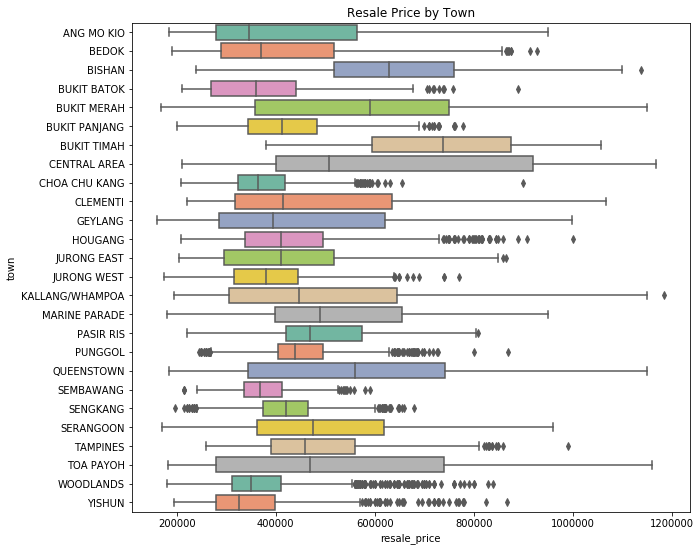

In [9]:
plt.figure(figsize=(10,9))
plot = sns.boxplot(x='resale_price', y='town', data=df, palette='Set2')
plt.title('Resale Price by Town', fontsize=12)
ax = plot.axes

In [10]:
town = df.groupby('town')
print(town)

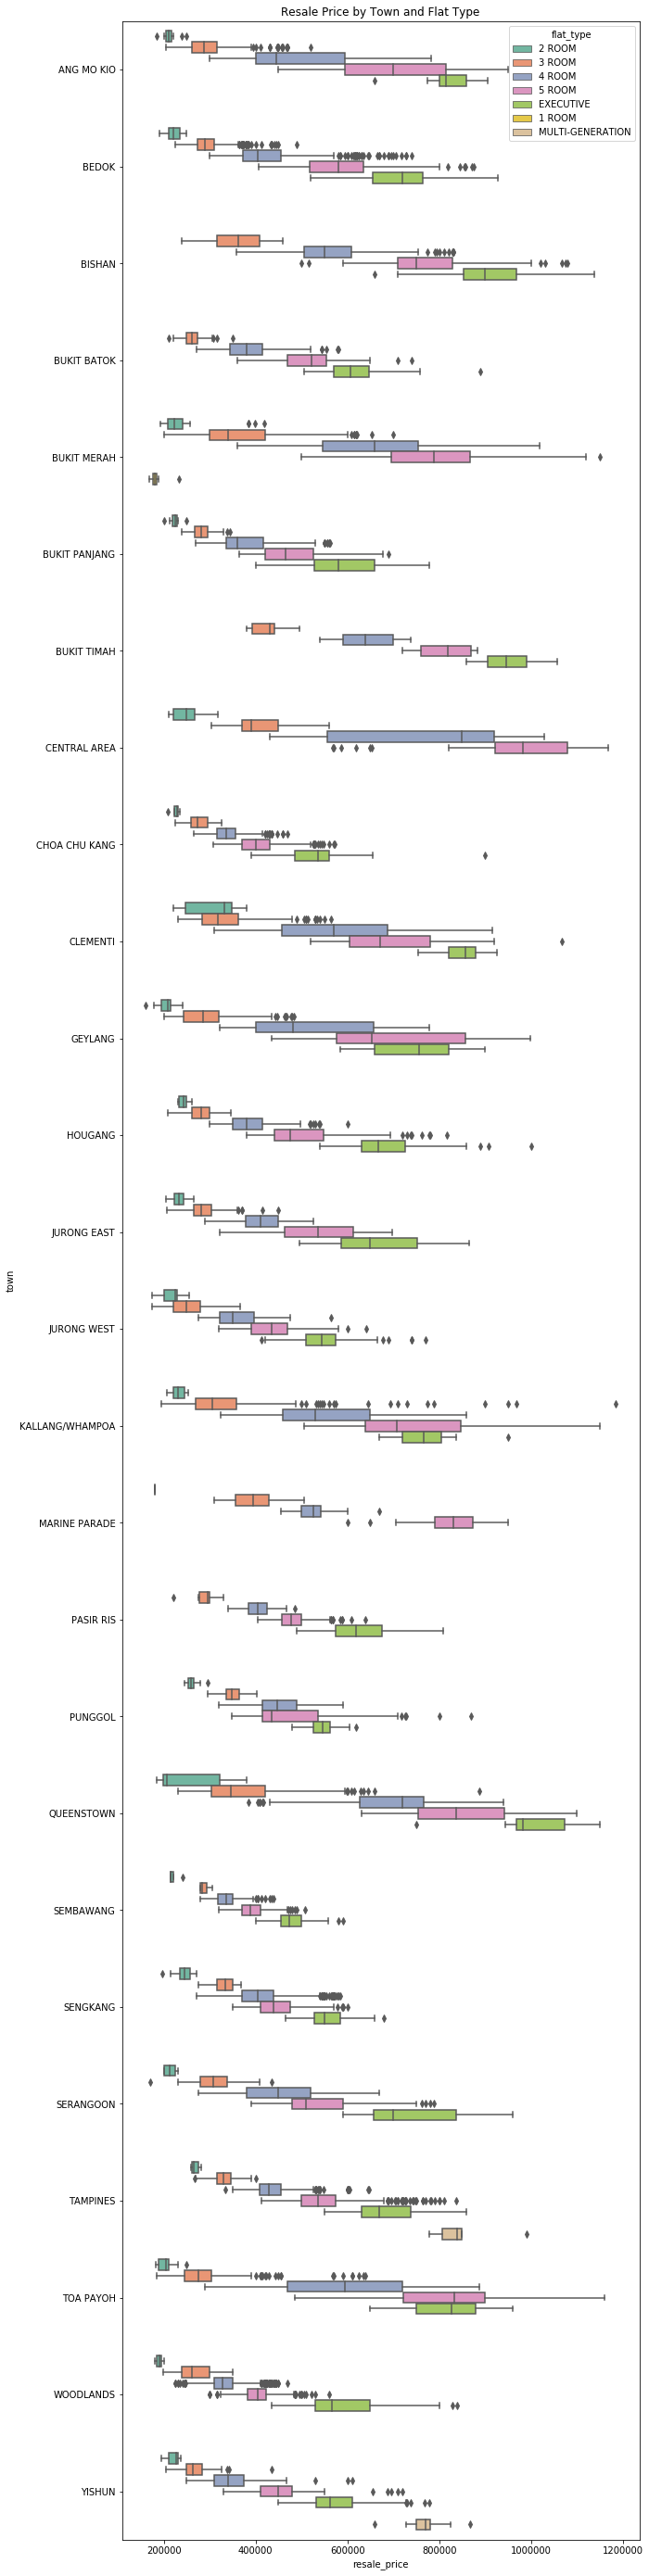

In [12]:
plt.figure(figsize=(10,50))
plot = sns.boxplot(x='resale_price', y='town', hue='flat_type', data=df, palette='Set2')
plt.title('Resale Price by Town and Flat Type', fontsize=12)
ax = plot.axes